# Signals and Systems CA1

Question 2: Step and impulse responses for systems

# 1.1

We calculate the impulse and step responses to the systems and then calculate it by numpy and plot them:

$$A: y[n] = \frac{1}{2}(x[n] + x[n-1])$$

Impulse response:
$$h[n] = \frac{1}{2}(\delta[n] + \delta[n-1]) \Rightarrow h[1] = \frac{1}{2}(0 + 1) = \frac{1}{2}, h[0] = \frac{1}{2}(1 + 0) = \frac{1}{2}, \forall n \neq 0,1: h[n] = 0$$

Step response:
$$s[n] = \Sigma_{k=-\infty}^{n} h[k] \Rightarrow s[0] = \frac{1}{2}, s[1] = 1, \forall n < 0: s[n] = 0, \forall n > 1: s[n] = 1$$

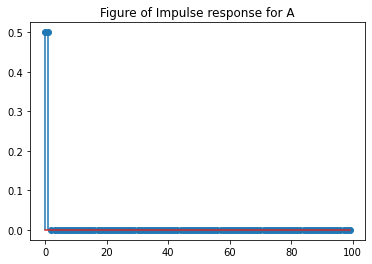

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sig

title = "Figure of {} response for {}"
N = 100

def draw(response, name,x_, y_):
    plt.stem(x_, y_, use_line_collection=True)
    plt.title(title.format(response, name))
    plt.show()

def impulse(n):
    return np.piecewise(n, [n != 0, n == 0], [0, 1])
x_samples = np.arange(0, 100, 1)

def system1(n, x):
    return (x(n)+x(n-1))/2

y_samples = system1(x_samples, impulse)
draw("Impulse", "A", x_samples, y_samples)

$$B: y[n] = x[n+1] - x[n]$$

Impulse response:
$$h[n] = delta[n+1] - \delta[n] \Rightarrow h[-1] = 1 - 0 = 1, h[0] = 0 - 1 = -1, \forall n \neq -1,0: h[n] = 0$$

Step response:
$$s[n] = \Sigma_{k=-\infty}^{n} h[k] \Rightarrow s[-1] = 1, s[0] = -1 + 1 = 0 \Rightarrow \forall n \neq -1: s[n] = 0$$

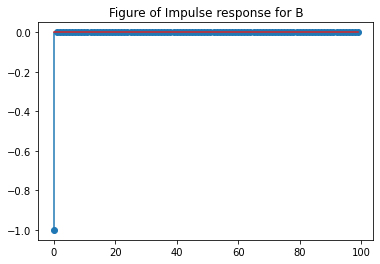

In [16]:
def system2(n, x):
    return x(n+1) - x(n)

y_samples = system2(x_samples, impulse)
draw("Impulse", "B", x_samples, y_samples)


$$C: y[n] = x[n+1] - 2x[n] + x[n-1]$$

Impulse response:
$$h[n] = delta[n+1] - 2\delta[n] + \delta[n-1]\Rightarrow h[-1] = 1 - 0 + 0= 1, h[0] = 0 - 2 + 0 = -2, h[1] = 0 - 0 + 1 = 1\forall n \neq -1,0,1: h[n] = 0$$

Step response:
$$s[n] = \Sigma_{k=-\infty}^{n} h[k] \Rightarrow s[-1] = 1, s[0] = -2 + 1 = -1, s[1] = 1 - 1 = 0 \Rightarrow \forall n \neq -1, 0: s[n] = 0$$

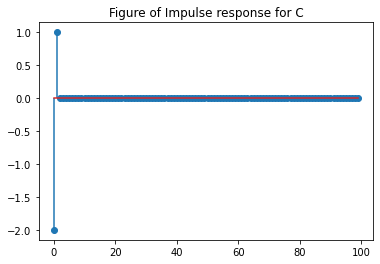

In [17]:

def system3(n, x):
    return x(n+1) - 2*x(n) + x(n-1)

y_samples = system3(x_samples, impulse)
draw("Impulse", "C", x_samples, y_samples)



$$C: y[n] = \Sigma_{m=0}^{19} cos(\frac{\pi m}{10})x[n-m]$$

Impulse response:
$$h[n] = \Sigma_{m=0}^{19} cos(\frac{\pi m}{10})\delta[n-m]\Rightarrow \forall n: 0 \leq n \leq 19: h[n] = cos(\frac{\pi n}{10}), O.W: h[n] = 0$$

Step response:
$$s[n] = \Sigma_{k=-\infty}^{n} h[k] \Rightarrow$$

$$\forall n < 0: s[n] = 0, \forall n: 0 \leq n \leq 19: s[n] = \Sigma_{m=0}^{n} cos(\frac{\pi m}{10}), \forall n > 19: s[n] = \Sigma_{m=0}^{19} cos(\frac{\pi m}{10})$$